# Project: Investigate a Dataset - [TMDb movie data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The TMDb movie data is the data of movies across years, title of movie, ID, revenue, budget, populartity, cast...etc. 


### Question(s) for Analysis
We will check most popular genres, the movie with highest revenue

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 3.6MB/s eta 0:00:01  3% |█                               | 317kB 14.5MB/s eta 0:00:01    13% |████▎                           | 1.4MB 20.2MB/s eta 0:00:01    55% |█████████████████▊              | 5.8MB 25.3MB/s eta 0:00:01    77% |████████████████████████▋       | 8.0MB 22.5MB/s eta 0:00:01    98% |███████████████████████████████▍| 10.3MB 23.5MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 2.2MB/s eta 0:00:01   54% |█████████████████▌              | 7.3MB 23.6MB/s eta 0:00:01    63% |████████████████████▏           | 8.4MB 19.3MB/s eta 0:00:01    84% |███████████████████████████▏    | 11.4MB 18.2MB/s eta 0:00:01    92% |█████████████████████████████▌  | 12.3MB 23.8MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1.12.1
  Found existing installation: 

<a id='wrangling'></a>
## Data Wrangling




### General Properties


In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')



### Data Cleaning


In [4]:
# check heads
df.head()

TypeError: __init__() got an unexpected keyword argument 'max_rows'

       id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      

In [5]:
# checking years
df['release_year'].unique()

array([2015, 2014, 1977, 2009, 2010, 1999, 2001, 2008, 2011, 2002, 1994,
       2012, 2003, 1997, 2013, 1985, 2005, 2006, 2004, 1972, 1980, 2007,
       1979, 1984, 1983, 1995, 1992, 1981, 1996, 2000, 1982, 1998, 1989,
       1991, 1988, 1987, 1968, 1974, 1975, 1962, 1964, 1971, 1990, 1961,
       1960, 1976, 1993, 1967, 1963, 1986, 1973, 1970, 1965, 1969, 1978,
       1966])

In [6]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.drop(df.columns[1:3],axis = 1 , inplace = True)

df.drop(['homepage', 'keywords', 'overview', 'production_companies', 'vote_count', 'vote_average'],axis = 1 , inplace = True)

In [7]:
df.shape

(10866, 13)

In [8]:
# checking if there is duplication
df.duplicated().sum()

1

In [9]:
# deleting the duplication
df.drop_duplicates(inplace=True)

We dropped extra columns we will not use in our analysis
we also drop the duplicated row as there is no meaning for his duplication

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (Which genres are most popular from year to year?!)

In [10]:
# we must extract genres versus year
data = df['genres'].str.cat(sep = '|')
genres = pd.Series(data.split('|'))
genres.head()


0             Action
1          Adventure
2    Science Fiction
3           Thriller
4             Action
dtype: object

In [11]:
 count = genres.value_counts()
count.head()

Drama       4760
Comedy      3793
Thriller    2907
Action      2384
Romance     1712
dtype: int64

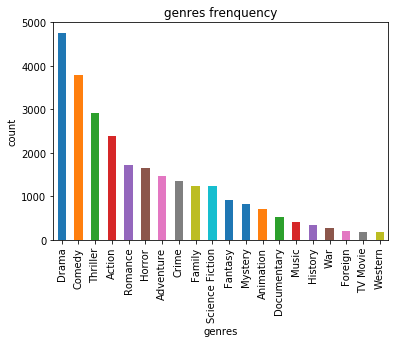

In [12]:
count.plot(kind='bar')
plt.xlabel('genres')
plt.ylabel('count')
plt.title('genres frenquency')
plt.show()


conclusion:it seems like darama and comedy are produced by large amount so it may give them high profit 


In [13]:
## we will check trend of number of films versus years
new=df[['id', 'release_year']]

In [14]:
new.groupby(['release_year'])['id'].count()

release_year
1960     32
1961     31
1962     32
1963     34
1964     42
1965     35
1966     46
1967     40
1968     39
1969     31
1970     41
1971     55
1972     40
1973     55
1974     47
1975     44
1976     47
1977     57
1978     65
1979     57
1980     78
1981     82
1982     81
1983     80
1984    105
1985    109
1986    121
1987    125
1988    145
1989    137
1990    132
1991    133
1992    133
1993    178
1994    184
1995    175
1996    204
1997    192
1998    210
1999    224
2000    227
2001    242
2002    266
2003    281
2004    307
2005    364
2006    408
2007    438
2008    496
2009    533
2010    489
2011    540
2012    588
2013    659
2014    700
2015    629
Name: id, dtype: int64

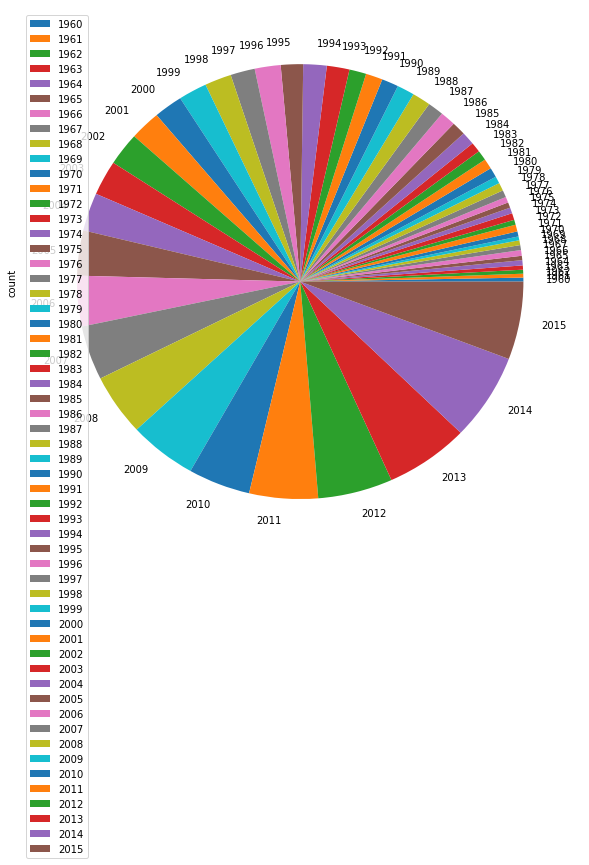

In [15]:
# plotting pie chart 
yearly=new.groupby(['release_year'])['id'].describe()[['count']]
plot = yearly.plot.pie(y='count' ,figsize=(10, 10))
# It looks like number of film are increasing through years as facilities are better

conclusion:It looks like number of film are increasing through years as facilities are better

## Research Question 2  (Movies with highest Revenue)

In [16]:
#checking types
df.dtypes


id                  int64
budget              int64
revenue             int64
original_title     object
cast               object
director           object
tagline            object
runtime             int64
genres             object
release_date       object
release_year        int64
budget_adj        float64
revenue_adj       float64
dtype: object

In [21]:
## checking the highest revenue
highest=df['revenue'].idxmax()

In [22]:
##getting film with highest revenue
film=pd.DataFrame(df.loc[highest])

In [24]:
##getting the film details with highest revenue
film

TypeError: __init__() got an unexpected keyword argument 'max_rows'

                                                             1386
id                                                          19995
budget                                                  237000000
revenue                                                2781505847
original_title                                             Avatar
cast            Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
director                                            James Cameron
tagline                               Enter the World of Pandora.
runtime                                                       162
genres                   Action|Adventure|Fantasy|Science Fiction
release_date                                             12/10/09
release_year                                                 2009
budget_adj                                            2.40887e+08
revenue_adj                                           2.82712e+09

Avatar is the film with highest revenue

<a id='conclusions'></a>
## Conclusions

>1.The most populare films are darama film
  >2. Avatar is the highest revenue film
  >3.number of films by year is increased across years.


### Limitations
> Some films are missing in genres
The data are till 2015, so after updating it all conclusions may vary



## Submitting your Project 



In [25]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0